Authors:
蔡浩城
林锐
周梓睿

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#remaining money at 60 years old
x1 = 1100000
#x1 = eval(input("remaining money at 60 years old"))

#stock percentage
x2 = 0.2
#x2 = eval(input("stock percentage"))

#bond percentage
x4 = 0.3
#x4 = eval(input("bond percentage"))

#annual interest
x6 = 0.03
#x6 = eval(input("annual interest"))

#inflation
x8 = 0.017
#x8 = eval(input("inflation"))

#amount of simulation 
lenOfSimulation = 10000
#lenOfSimulation = eval(input("mount of simulation"))

#which year do you want to know how many money remains
ith_year = 10
#ith_year = eval(input("which year do you want to know how many money remains"))

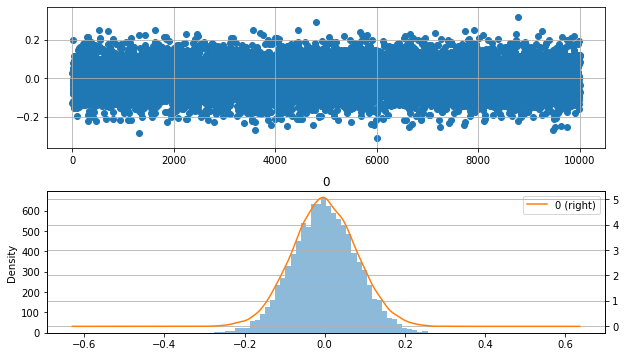

In [3]:
#stock return rate   -10%---+10%
x3 = np.random.normal(loc = 0, scale = 0.08, size = lenOfSimulation)
df_x3 = pd.DataFrame(x3)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2,1,1)
lengthX3 = [i for i in range(len(df_x3))]
ax1.scatter(df_x3.index, df_x3.values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
df_x3.hist(bins = 50, alpha = 0.5, ax = ax2)
df_x3.plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

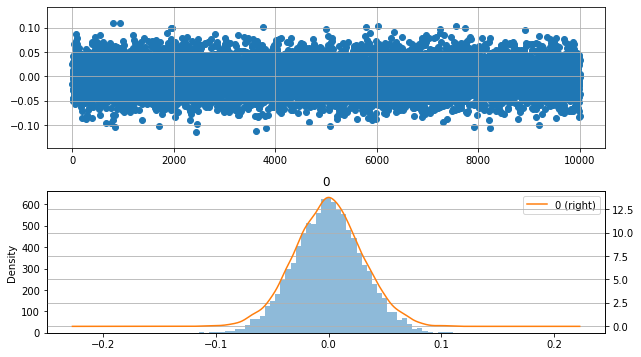

In [4]:
#bond return rate -5%---+5%
x5 = np.random.normal(loc = 0, scale = 0.03, size = lenOfSimulation)
df_x5 = pd.DataFrame(x5)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2,1,1)
lengthX5 = [i for i in range(len(df_x5))]
ax1.scatter(df_x5.index, df_x5.values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
df_x5.hist(bins = 50, alpha = 0.5, ax = ax2)
df_x5.plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

61694.63273654873
37965.537041271265


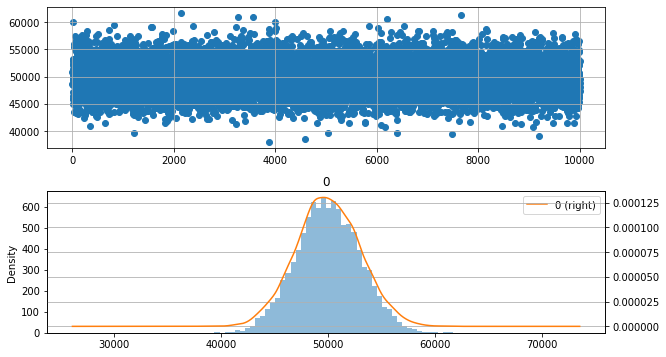

In [5]:
#annual cost 
x7 = np.random.normal(loc = 50000, scale = 10000*0.3, size = lenOfSimulation)
print(max(x7))
print(min(x7))

df_x7 = pd.DataFrame(x7)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2,1,1)
lengthX7 = [i for i in range(len(df_x7))]
ax1.scatter(df_x7.index, df_x7.values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
df_x7.hist(bins = 50, alpha = 0.5, ax = ax2)
df_x7.plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

In [6]:
def predict_result(y, lenOfSimulation):
    #suppose 60-y-o reteire and to 100 y-o
    #first year is calculated in advance
    years = 39
    total_result = {}
    #total_result.append({"index": 0, "value": y})
    total_result[0] = y
    for i in range(years):
        count = i + 1
        x3 = np.random.normal(loc = 0, scale = 0.08, size = lenOfSimulation)
        x5 = np.random.normal(loc = 0, scale = 0.03, size = lenOfSimulation)
        x7 = np.random.normal(loc = 50000, scale = 10000*0.3, size = lenOfSimulation)
        y = (y * x2 * (1 + x3) + y * x4 * (1 + x5) + y * (1 - x2 - x4) * (1 + x6) - x7) * (1 + x8)
        #total_result.append({"index": count, "value": y})
        total_result[count] = y
    return total_result

In [7]:
# ascending sorting
def sort_result(input_result):
    sorted_result = []
    for i in range(len(input_result)):
        sorted_result.append(sorted(input_result[i]))
    return sorted_result

In [8]:
def extract_percentile(sorted_result, lenOfSimulation):
    #since we siumlate 1000 for each age, thus the corresponding perceltile is x*1000
    _10th_p = []
    _25th_p = []
    _50th_p = []
    _75th_p = []
    _95th_p = []
    
    _10th = int(0.1 * lenOfSimulation)
    _25th = int(0.25 * lenOfSimulation)
    _50th = int(0.50 * lenOfSimulation)
    _75th = int(0.75 * lenOfSimulation)
    _95th = int(0.95 * lenOfSimulation)
    
    for i in range(len(sorted_result)):
        _10th_p.append(sorted_result[i][_10th])
        _25th_p.append(sorted_result[i][_25th])
        _50th_p.append(sorted_result[i][_50th])
        _75th_p.append(sorted_result[i][_75th])
        _95th_p.append(sorted_result[i][_95th])
    return _10th_p, _25th_p, _50th_p, _75th_p, _95th_p

In [9]:
def count_success_p(sorted_result, lenOfSimulation):
    p_list = []
    for i in range(len(sorted_result)):
        temp_len = len([w for w in range(len(sorted_result[i])) if sorted_result[i][w] > 0])
        p_list.append(temp_len/lenOfSimulation)
    return p_list

In [10]:
def count_frequence(input_result, lenOfSimulation):
    inter_num = 300
    frequency_distributions = {}
    money = {}
    for year in input_result.keys():
        max_val = max(input_result[year])
        min_val = min(input_result[year])
        inter_len = (max_val - min_val)/inter_num
        frequency_distribution = np.zeros(inter_num)
        
        ith_year_money = []
        for i in range(inter_num):
            ith_year_money.append(min_val+i*inter_len)
        
        for value in input_result[year]:
            if value == max_val:
                position = divmod(value-min_val,inter_len)[0]-1
            else:
                position = divmod(value-min_val,inter_len)[0]
            frequency_distribution[int(position)] += 1
        money[year] = ith_year_money
        frequency_distribution /= lenOfSimulation
        frequency_distributions[year] = frequency_distribution
    return frequency_distributions, money

In [29]:
y1 = (x1*x2*(1+x3) + x1*x4*(1+x5) + x1*(1-x2-x4)*(1+x6) - x7)*(1+x8)
total_result = predict_result(y1,lenOfSimulation)
sorted_result = sort_result(total_result)
_10th_p, _25th_p, _50th_p, _75th_p, _95th_p = extract_percentile(sorted_result, lenOfSimulation)
result_success_p = count_success_p(sorted_result, lenOfSimulation)
x_data = [i for i in range(40)]

result, money = count_frequence(total_result, lenOfSimulation)
accumulated_probability = result[ith_year].copy()
for i in range(1,len(accumulated_probability)):
    accumulated_probability[i] = accumulated_probability[i-1] + accumulated_probability[i]


# fig = plt.figure(figsize=(50, 70))
# ax1 = fig.add_subplot(4,1,1)
# ax1.plot(x_data, _10th_p, "-o", color = "r", label = "10th percentile")
# ax1.plot(x_data, _25th_p, "-o", color = "b", label = "25th percentile")
# ax1.plot(x_data, _50th_p, "-o", color = "y", label = "50th percentile")
# ax1.plot(x_data, _75th_p, "-o", color = "grey", label = "75th percentile")
# ax1.plot(x_data, _95th_p, "-o", color = "purple", label = "95th percentile")
# ax1.legend()


# #probability graph
# ax2 = fig.add_subplot(4,1,2)
# ax2.plot(x_data, result_success_p, "-o", color = 'b', label = "Probability")
# ax2.legend()

# ax3 = fig.add_subplot(4,1,3)
# ax3.plot(money[ith_year], result[ith_year], label = "Probability")
# ax3.legend()

# ax4 = fig.add_subplot(4,1,4)
# ax4.plot(money[ith_year],1-accumulated_probability, label = "Accumulated Probability")
# ax4.legend()

# plt.show()

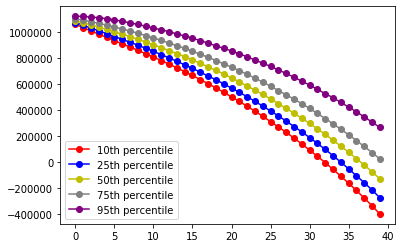

In [30]:
plt.plot(x_data, _10th_p, "-o", color = "r", label = "10th percentile")
plt.plot(x_data, _25th_p, "-o", color = "b", label = "25th percentile")
plt.plot(x_data, _50th_p, "-o", color = "y", label = "50th percentile")
plt.plot(x_data, _75th_p, "-o", color = "grey", label = "75th percentile")
plt.plot(x_data, _95th_p, "-o", color = "purple", label = "95th percentile")
plt.legend()
plt.show()

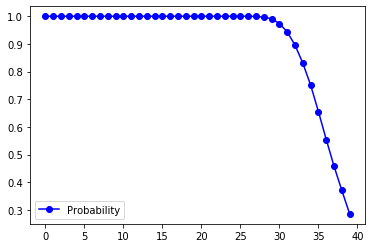

In [31]:
plt.plot(x_data, result_success_p, "-o", color = 'b', label = "Probability")
plt.legend()
plt.show()

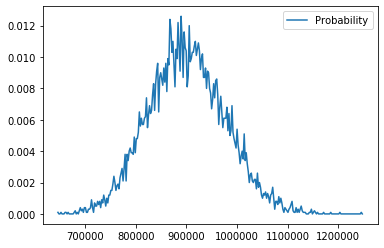

In [32]:
plt.plot(money[ith_year], result[ith_year], label = "Probability")
plt.legend()
plt.show()

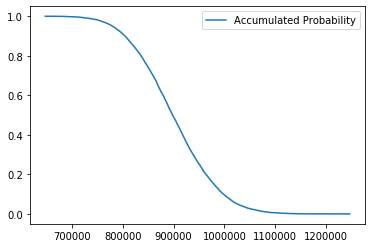

In [33]:
plt.plot(money[ith_year],1-accumulated_probability, label = "Accumulated Probability")
plt.legend()
plt.show()